In [1]:
#Importimg the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Loading the data into sales as pandas dataframe
sales = pd.read_excel("sales_data.xlsx")
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [3]:
#sorting the data according to 'CustomerID'
sales = sales.sort_values(by=['CustomerID'])
sales.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
2266,1,61,34847.40,571.27,297.50,4.88,2020-03-03,2021-09-02,8.98,53,...,12946.22,8109.45,11,3,29,18,2293.90,1809.47,17749.01,12995.02
2876,2,59,32486.98,550.63,218.68,3.71,2019-02-13,2021-07-23,15.10,94,...,9094.21,7755.92,7,36,15,1,1350.28,23832.77,6893.93,410.00
2267,3,53,24178.97,456.21,43.97,0.83,2018-02-15,2021-09-02,24.43,53,...,6431.97,3879.00,0,34,18,1,0.00,16030.98,7996.99,151.00
1153,4,84,18554.49,220.89,421.29,5.02,2016-10-01,2021-10-20,21.96,5,...,5609.60,5117.11,2,46,22,14,140.98,11795.40,4557.05,2061.06
3377,5,26,16884.99,649.42,54.89,2.11,2015-12-27,2021-06-17,76.88,130,...,2265.46,8274.97,13,4,6,3,7700.24,1945.00,4751.96,2487.79


In [4]:
#FREQUENCY
frequency = sales[['CustomerID','TOTAL_ORDERS']]
frequency.head()

,CustomerID,TOTAL_ORDERS
2266,1,61
2876,2,59
2267,3,53
1153,4,84
3377,5,26


In [5]:
frequency = frequency.reset_index()
frequency.drop(['index'], axis=1,inplace=True)
frequency.head()

,CustomerID,TOTAL_ORDERS
0,1,61
1,2,59
2,3,53
3,4,84
4,5,26


In [6]:
#MONETARY
groupDf = sales[['CustomerID','AVERAGE_ORDER_VALUE']]
groupDf = groupDf.reset_index()
groupDf.drop(['index'],axis=1,inplace=True)
groupDf.head()

,CustomerID,AVERAGE_ORDER_VALUE
0,1,571.27
1,2,550.63
2,3,456.21
3,4,220.89
4,5,649.42


In [7]:
#Merging Frequency and Monetary DFs(groupDf)
groupDf = pd.merge(groupDf,frequency, on='CustomerID', how='inner')
groupDf.head()

,CustomerID,AVERAGE_ORDER_VALUE,TOTAL_ORDERS
0,1,571.27,61
1,2,550.63,59
2,3,456.21,53
3,4,220.89,84
4,5,649.42,26


In [8]:
groupDf.columns = ['CustomerID','amount','frequency']
groupDf.head()

,CustomerID,amount,frequency
0,1,571.27,61
1,2,550.63,59
2,3,456.21,53
3,4,220.89,84
4,5,649.42,26


In [9]:
#RECENCY
recency = sales[['CustomerID','DAYSSINCELASTORDER']]
recency = recency.reset_index()
recency.drop(['index'],axis=1,inplace=True)
recency.head()

,CustomerID,DAYSSINCELASTORDER
0,1,53
1,2,94
2,3,53
3,4,5
4,5,130


In [10]:
#Merging groupDf and RECENCY dfs to get a consolidated one
groupDf = pd.merge(groupDf, recency, on='CustomerID', how='inner')
groupDf.head()

,CustomerID,amount,frequency,DAYSSINCELASTORDER
0,1,571.27,61,53
1,2,550.63,59,94
2,3,456.21,53,53
3,4,220.89,84,5
4,5,649.42,26,130


In [11]:
groupDf.columns = ['CustomerID','amount','frequency','recency']
groupDf.head()

,CustomerID,amount,frequency,recency
0,1,571.27,61,53
1,2,550.63,59,94
2,3,456.21,53,53
3,4,220.89,84,5
4,5,649.42,26,130


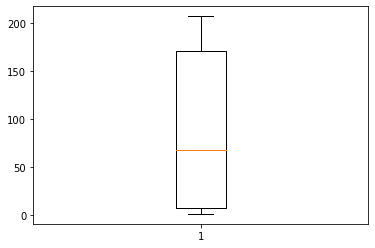

In [12]:
#checking the data for further clustering prcessing and analysis
plt.boxplot(groupDf['recency'])
plt.show()

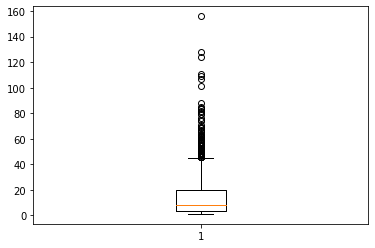

In [13]:
plt.boxplot(groupDf['frequency'])
plt.show()

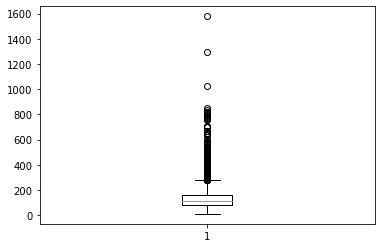

In [14]:
plt.boxplot(groupDf['amount'])
plt.show()

Since there are a lot of outliers in the data, in frequency and amount. Thus proceeding with outlier's treatment.

#### Outlier's Treatment

In [15]:
# for amount
q1 = groupDf.amount.quantile(0.05)
q3 = groupDf.amount.quantile(0.95)
iqr = q3-q1
groupDf = groupDf[(groupDf.amount >= q1 - 1.5*iqr)&(groupDf.amount <= q3+1.5*iqr)]

# for frequency
q1 = groupDf.frequency.quantile(0.05)
q3 = groupDf.frequency.quantile(0.95)
iqr = q3-q1
groupDf = groupDf[(groupDf.frequency >= q1 - 1.5*iqr)&(groupDf.frequency <= q3+1.5*iqr)]

# for recency
q1 = groupDf.recency.quantile(0.05)
q3 = groupDf.recency.quantile(0.95)
iqr = q3-q1
groupDf = groupDf[(groupDf.recency >= q1 - 1.5*iqr)&(groupDf.recency <= q3+1.5*iqr)]
groupDf.head()

,CustomerID,amount,frequency,recency
0,1,571.27,61,53
1,2,550.63,59,94
2,3,456.21,53,53
3,4,220.89,84,5
4,5,649.42,26,130


In [16]:
# Rescaling the data
rfmDf = groupDf[['amount','frequency','recency']]

# instantiating
scaler = StandardScaler()

# Using Fit-Transform

rfmDfScaled = scaler.fit_transform(rfmDf)
rfmDfScaled.shape

(4973, 3)

In [17]:
rfmDfScaled = pd.DataFrame(rfmDfScaled)
rfmDfScaled.columns = ['amount','frequency','recency']
rfmDfScaled.head()

,amount,frequency,recency
0,5.507327,4.025029,-0.430091
1,5.247431,3.858249,0.080965
2,4.058503,3.357910,-0.430091
3,1.095377,5.942994,-1.028399
4,6.491385,1.106386,0.529696


### Modelling
#### Using K-Means Algorithm

In [18]:
# Using an arbitrary number (n_cluster = 4)
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfmDfScaled)


KMeans(max_iter=50, n_clusters=4)

In [19]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 0])

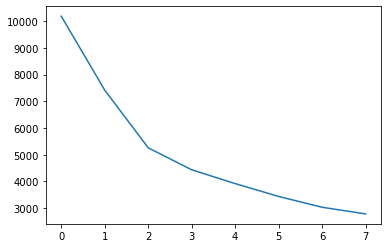

In [20]:
# sum of squared distance (ssd)
ssd=[]
range_n_clusters= [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfmDfScaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

### Hopkins Test
Going for Hopkins Test to chack if the data is clusterable

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(rfmDfScaled)

0.9209553084102718

Since the number is close to one thus the data is clusterable. Now proceeding with Silhouette's Analysis.

### Silhouette's Analysis

From th elbow curve we found that the X-point (2) ,i.e, 4 clusters are optimal for the data. Thus using 4 as the optimal number.

In [23]:
kmeans = KMeans(n_clusters = 4,max_iter=50)
kmeans.fit(rfmDfScaled)

KMeans(max_iter=50, n_clusters=4)

In [24]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 1])

In [25]:
# Assigning the cluster label to the groupDf
groupDf['clusterID'] = kmeans.labels_
groupDf.head()

,CustomerID,amount,frequency,recency,clusterID
0,1,571.27,61,53,2
1,2,550.63,59,94,2
2,3,456.21,53,53,2
3,4,220.89,84,5,0
4,5,649.42,26,130,2


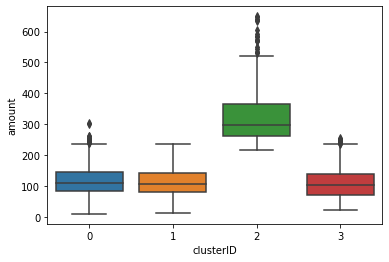

In [26]:
#plotting
sns.boxplot(x='clusterID',y='amount',data=groupDf)
plt.show()

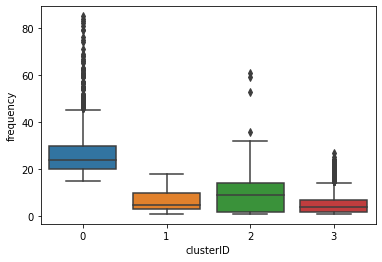

In [27]:
sns.boxplot(x='clusterID',y='frequency',data=groupDf)
plt.show()

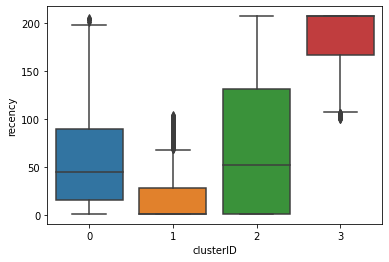

In [28]:
sns.boxplot(x='clusterID',y='recency',data=groupDf)
plt.show()

In [29]:
rfmDfScaled.head()

,amount,frequency,recency
0,5.507327,4.025029,-0.430091
1,5.247431,3.858249,0.080965
2,4.058503,3.357910,-0.430091
3,1.095377,5.942994,-1.028399
4,6.491385,1.106386,0.529696


### Hierarchical Clustering

In [30]:
# viewing the data
rfmDfScaled.head()

,amount,frequency,recency
0,5.507327,4.025029,-0.430091
1,5.247431,3.858249,0.080965
2,4.058503,3.357910,-0.430091
3,1.095377,5.942994,-1.028399
4,6.491385,1.106386,0.529696


In [31]:
groupDf.head()

,CustomerID,amount,frequency,recency,clusterID
0,1,571.27,61,53,2
1,2,550.63,59,94,2
2,3,456.21,53,53,2
3,4,220.89,84,5,0
4,5,649.42,26,130,2


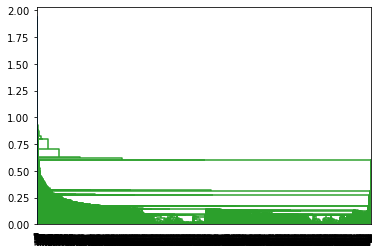

In [32]:
# performing the Single linkage
mergings = linkage(rfmDfScaled , method = 'single' , metric = 'euclidean')
dendrogram(mergings)
plt.show()

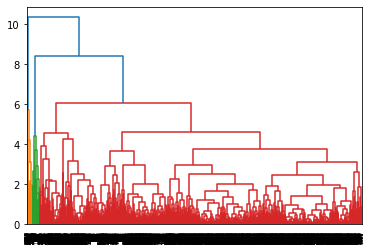

In [33]:
# Complete Linkage
mergings = linkage(rfmDfScaled, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [34]:
# 4 clusters
cluster_labels = cut_tree(mergings,n_clusters = 4).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 3, 3, 3])

In [35]:
groupDf['cluster_labels'] = cluster_labels
groupDf.head()

,CustomerID,amount,frequency,recency,clusterID,cluster_labels
0,1,571.27,61,53,2,0
1,2,550.63,59,94,2,0
2,3,456.21,53,53,2,0
3,4,220.89,84,5,0,1
4,5,649.42,26,130,2,0


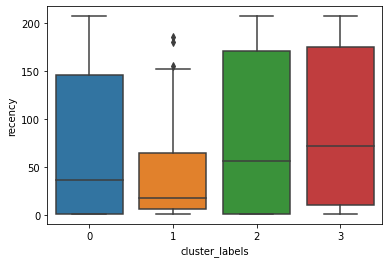

In [36]:
sns.boxplot(x = 'cluster_labels', y = 'recency', data = groupDf)
plt.show()

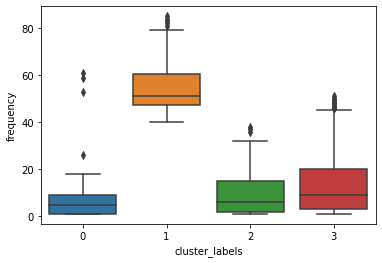

In [37]:
sns.boxplot(x = 'cluster_labels', y = 'frequency', data = groupDf)
plt.show()

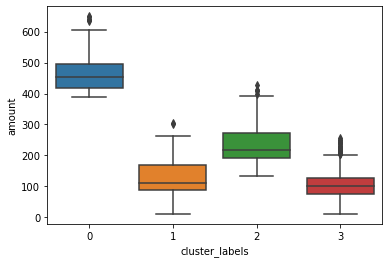

In [38]:
sns.boxplot(x = 'cluster_labels', y = 'amount', data = groupDf)
plt.show()

As we can see from the above three boxplots, the Cluster 4 (cluster_label = 3) has made the most recent order and it also makes the orders more frequently as compared to others. However when we compare the average amount per order it turns out to be the least for the customers in the cluster 4. We can also consider cluster 3 (cluster_label = 2) for the most recent order after cluster 4 and cluster 3 has made the most frequent orders after cluster 4 however when we compare the average amount per order cluster 3 (cluster_labels = 2) scores a second position again. So we should be focusing on Cluster 3 (cluster_labels = 2) if we want to have a good amount of sales and profits.

We could also see that cluster 1 (cluster_labels = 0) has made the purchase for highest amounts but have made the order less frequently. We could ask our marketing team to roll out more attention grabbing advertisements for those particular set of customers in order to have more revenue as they have also made orders recently which means Cluster 1 customers are loyal too.

 We could also proceed with the scatter plot and see which users have made the highest number of orders on each day of the week with the highest revenue. Similarly we could go with the weekwise data and a particular day's time wise data so that we could target the potential customers when there's a high likelihood for them to buy.


For example: For checking customerwise report of orders and revenue on monday we could use a scatter plot.

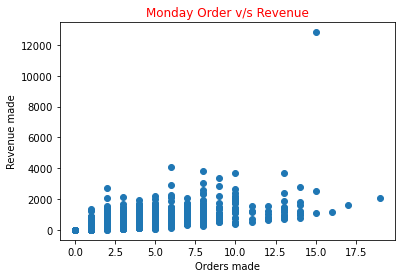

In [46]:
plt.scatter(x=sales['MONDAY_ORDERS'],y=sales['MONDAY_REVENUE'])
plt.title('Monday Order v/s Revenue', color= 'Red')
plt.xlabel('Orders made')
plt.ylabel('Revenue made')
plt.show()